In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os
path_prefix = '/content/drive/MyDrive/Data_df'

In [2]:
#Метод выводящий предварительную информацию про df
def plot_df_info(df_data, headqty = 5, show_describe = True):
    #Размер выборки
    print(f'Размер выборки: {df_data.shape}')

    #Первые 5 элементов
    print('---------------------------')
    print(f'Первые {headqty} элементов выборки:')
    print(df_data.head(headqty))
    print('---------------------------')

    #общее кол-во пропусков в таблице
    total_nan = df_data.isnull().sum().sum()

    #получим столбцы и подсчитаем пропуски в столбце
    cols_null_qty = df_data.isna().sum()

    #столбцы в которых есть пропуски
    cols_with_nan = cols_null_qty[cols_null_qty>0]

    print(f'Общее кол-во пропусков в df: {total_nan}')
    print(f'Кол-во пропусков в df по каждому столбцу:')
    print(f'{cols_null_qty}')

    print(cols_with_nan)

    if show_describe == True:
      print('---------------------------')
      print('Основные показатели df:')
      display(df_data.describe())

1. Анализ массива данных с информацией о лекциях

In [3]:
lectures_df = pd.read_csv(f'{path_prefix}/lectures.csv', sep=',')
plot_df_info(lectures_df, 5)

Размер выборки: (418, 4)
---------------------------
Первые 5 элементов выборки:
   lecture_id  tag  part           type_of
0          89  159     5           concept
1         100   70     1           concept
2         185   45     6           concept
3         192   79     5  solving question
4         317  156     5  solving question
---------------------------
Общее кол-во пропусков в df: 0
Кол-во пропусков в df по каждому столбцу:
lecture_id    0
tag           0
part          0
type_of       0
dtype: int64
Series([], dtype: int64)
---------------------------
Основные показатели df:


,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


In [4]:
#Отображение данных для столбца main_key и кол-ва вхождений
def plot_df_data(df_data, main_key, label_x, label_y, title, head_length = None, from_end = False):
    import itertools
    def addlabels(x,y):
        for i in range(len(x)):
            plt.text(i, y[i]//2, y[i], ha = 'center')

    head_vals = dict(df_data[main_key].value_counts())
    head_vals = {k: v for k, v in sorted(head_vals.items(), key=lambda item: item[1], reverse=True)}

    plt.figure(figsize=(10,5))
    if head_length != None:
      head_vals = dict(itertools.islice(head_vals.items(), head_length))
      plot = sns.countplot(x=main_key,data=df_data, order = df_data[main_key].value_counts().iloc[:head_length].index, palette = "Set2")
    else:
      plot = sns.countplot(x=main_key,data=df_data, order = df_data[main_key].value_counts().index, palette = "Set2")

    sns.set_style("whitegrid")
    plot.set_xlabel( label_x)
    plot.set_ylabel( label_y)
    plt.title(title)
    addlabels(list(head_vals.keys()), list(head_vals.values()))

    plt.xticks(rotation=90)
    plt.show()
    print('\n')


#Отображение данных для столбца main_key и столбца sub_key
def plot_df_data1(df_data, main_key, sub_key, label_x, label_y, title, head_length = None, from_end = False):
  df_data = df_data.iloc[0:head_length ]
  plot = df_data.plot(x=main_key, y=[sub_key],
        kind="bar", figsize=(10, 10), stacked=True, title = title)

  plot.set_xlabel( label_x)
  plot.set_ylabel( label_y)
  plt.title(title)

  plt.show()


In [5]:
#Гистограмма по main_key с учетом кол-ва и с доп. группировкой по hue
def plot_df_data2(df_data, main_key, label_x, label_y, title, hue):
  plt.figure(figsize=(10,5))
  plot = sns.countplot(x=main_key, data=df_data, hue=hue, order=df_data[main_key].value_counts().index)
  plt.title(title)
  plot.set_xlabel( label_x)
  plot.set_ylabel( label_y)
  plt.xticks(rotation=90)
  plt.show()
  print('\n')

<ipython-input-4-ba4cd5ba0749>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x=main_key,data=df_data, order = df_data[main_key].value_counts().index, palette = "Set2")


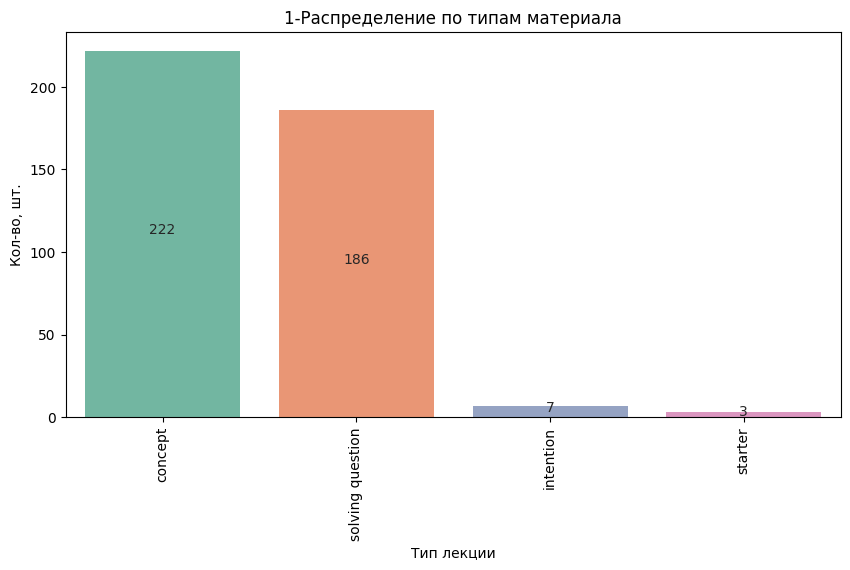

<ipython-input-4-ba4cd5ba0749>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x=main_key,data=df_data, order = df_data[main_key].value_counts().iloc[:head_length].index, palette = "Set2")


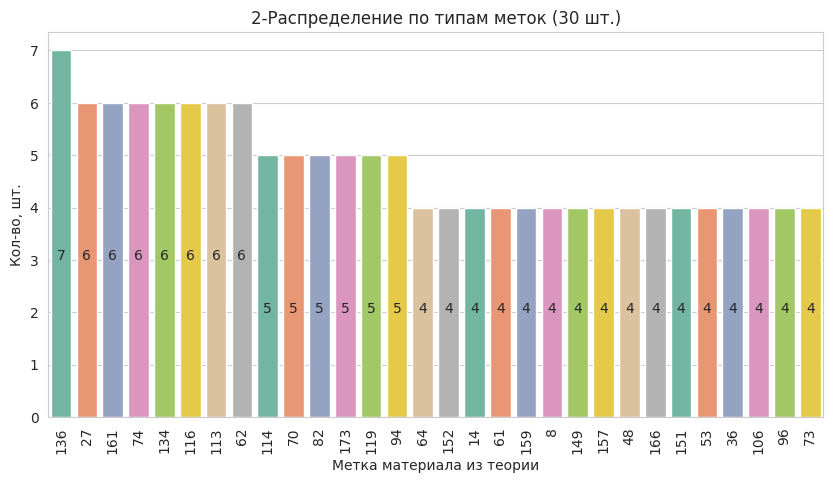

<ipython-input-4-ba4cd5ba0749>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x=main_key,data=df_data, order = df_data[main_key].value_counts().index, palette = "Set2")


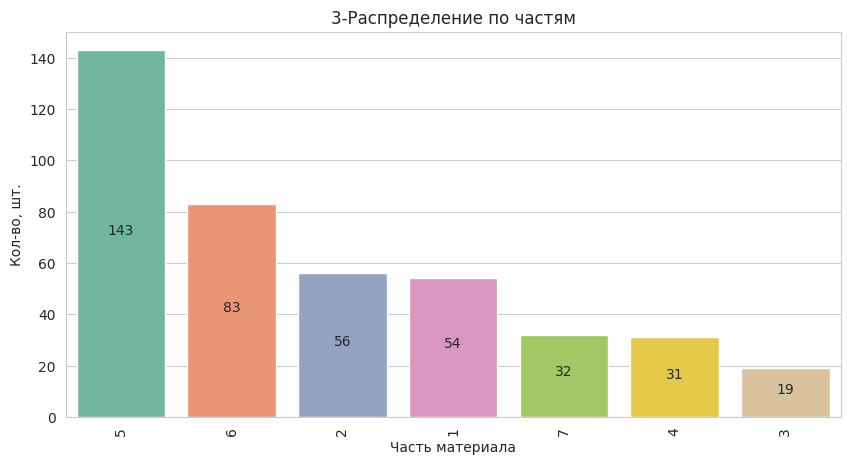

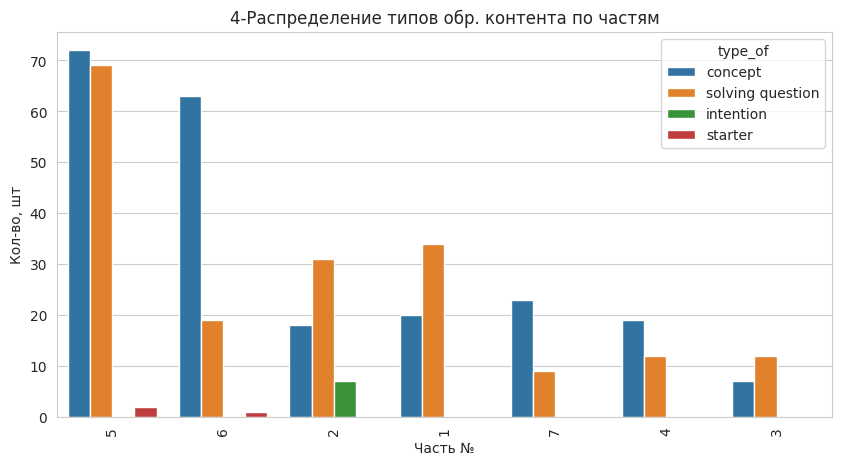

In [6]:
#Предварительный вывод данных по лекциям
plot_df_data(lectures_df, 'type_of', 'Тип лекции', 'Кол-во, шт.', '1-Распределение по типам материала')
plot_df_data(lectures_df, 'tag', 'Метка материала из теории', 'Кол-во, шт.', f'2-Распределение по типам меток ({30} шт.)', 30)
plot_df_data(lectures_df, 'part', 'Часть материала', 'Кол-во, шт.', '3-Распределение по частям')
plot_df_data2(lectures_df, 'part', 'Часть №', 'Кол-во, шт', '4-Распределение типов обр. контента по частям', 'type_of')

Предварительные выводы по выборке лекций:
1. Самый распространенный тип материала является "concept" (см. гистограмму 1)
2. Чаще всего встречается метка 136 (см. гистограмму 2) в кол-ве 7 шт
3. Наибольшее кол-во материала относится к части 5 (см. гистограмму 3)
4. Наибольший объем теории представлен в частях 5 и 6
5. Больше всего вопросов представлено в блоке 5
6. В массиве данных отсутсвуют пропуски

2. Анализ массива данных с информацией о вопросов

In [7]:
questions_df = pd.read_csv(f'{path_prefix}/questions.csv', sep=',')
plot_df_info(questions_df, 5)

Размер выборки: (13523, 5)
---------------------------
Первые 5 элементов выборки:
   question_id  bundle_id  correct_answer  part            tags
0            0          0               0     1   51 131 162 38
1            1          1               1     1       131 36 81
2            2          2               0     1  131 101 162 92
3            3          3               0     1  131 149 162 29
4            4          4               3     1    131 5 162 38
---------------------------
Общее кол-во пропусков в df: 1
Кол-во пропусков в df по каждому столбцу:
question_id       0
bundle_id         0
correct_answer    0
part              0
tags              1
dtype: int64
tags    1
dtype: int64
---------------------------
Основные показатели df:


,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


В массиве вопросов присутствует 1 запись без тэга, в дальнейшем было установлено, что данная запись в train присуствовала в единственном экземпляре, следовательно их рекомендуется удалить как из questions, так и из train

In [8]:
#обнаружим строку в которых присутсвуют значения nan
questns_nan = questions_df[questions_df['tags'].isna()]

#список id в которых обнаружены nan значения (его мы будем использовать для удаления записей из train)
quest_nan_ids = list(questns_nan['question_id'])

#очистим строчку с обнаруженным nan значением
questions_df = questions_df[questions_df['tags'].notna()]


<ipython-input-4-ba4cd5ba0749>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x=main_key,data=df_data, order = df_data[main_key].value_counts().index, palette = "Set2")


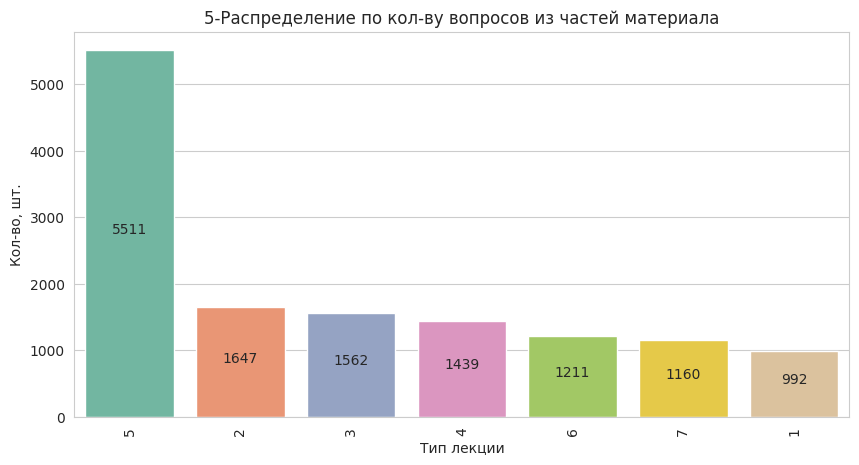

<ipython-input-4-ba4cd5ba0749>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x=main_key,data=df_data, order = df_data[main_key].value_counts().iloc[:head_length].index, palette = "Set2")


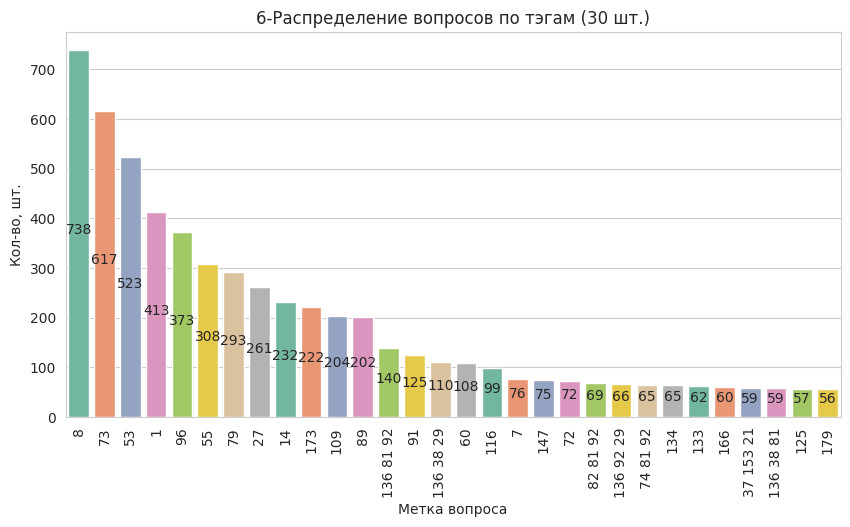



В массиве представлено всего типов комбинаций тэгов: 1519
В массиве представлено различных тэгов: 188


In [9]:
#Предварительный вывод данных по вопросам
plot_df_data(questions_df, 'part', 'Тип лекции', 'Кол-во, шт.', '5-Распределение по кол-ву вопросов из частей материала')
plot_df_data(questions_df, 'tags', 'Метка вопроса', 'Кол-во, шт.', f'6-Распределение вопросов по тэгам ({30} шт.)', 30)

#комбинации тэгов вопросов
print(f'В массиве представлено всего типов комбинаций тэгов: {len(set(questions_df["tags"].unique()))}')

tags = [str(x).split() for x in questions_df[questions_df.tags != "nan"].tags.values]
tags = [item for elem in tags for item in elem]
tags = set(tags)
tags = list(tags)

#всего встречается тэгов
print(f'В массиве представлено различных тэгов: {len(tags)}')

Предварительные выводы по выборке вопросов:
1. Больше всего было отвечено на вопросы из части - 5 (гистограмма 5)
2. Самый распространенный тэг вопроса - 8 (гистограмма 6)
3. В массиве представлено 1519 комбинаций тэгов вопросов
4. Всего приводится 188 тэгов вопросов
5. В данных встретилась 1 запись со значением nan, которая была исключена из массива, с целью дальнейшего анализа

Загрузить файл train целиком не получается на бесплатной версии colab, поэтому для начала я сделал следующее:
1. Удалил столбец "user_answer", т.к. особо нас не интересует эти данные, т.к. важнее именно факт правильного ответа
2. Преобразовал столбец "prior_question_had_explanation" в int (заменив False на 0, True на 1 и NAN и inf на -1
3. Весь общий df я поделил на отдельные столбцы (чтобы грузить не весь df ради нескольких столбцов, а чисто из конкретных собирать)

PS: есть в методе read в качестве аргумента список столбцов, но у меня память заканчивается и все у виртуальной машины (см. метод ниже), я ничего с этим сделать не смог. Во всякие pickle и проч. сторонние форматы и библиотеки не успел освоить.

3. Анализ данных с массивом студентов

In [10]:
#Метод который собирает df по списку столбцов в один, можно задать макс кол-во строк
#Метод из за того, что у меня толи Colab, толи еще чего, но в память он не
#помещается целиков и постоянно на загрузке падает
#поэтому весь train файл и поделил на столбцы (места на диске это занимает тьма))
#но зато можно теперь работать)))))
def df_from_columns(columns, parent_path, numb_rows = None):
  ret_df = pd.DataFrame()
  incr = 0
  for column in columns:
    file_path = os.path.join(parent_path, f'{column}_f.csv')
    if numb_rows != None:
      tmp_df = pd.read_csv(file_path, sep = ',', nrows= numb_rows)
    else:
      tmp_df = pd.read_csv(file_path, sep = ',')

    ret_df.insert(incr,column,tmp_df[column])
    tmp_df = pd.DataFrame()

    incr += 1
    print(f'Прочитан столбец {incr} из {len(columns)}')

  return ret_df

In [11]:
#Считаем массив из папки, в котором лежат данные по столбцам
columns = ['user_id', 'content_type_id', 'answered_correctly', 'prior_question_had_explanation']
train_df = df_from_columns(columns, path_prefix)

#Получим данные, которые относятся к вопросам
train_df = train_df[(train_df['content_type_id'] == 0) ]
del train_df['content_type_id']

Прочитан столбец 1 из 4
Прочитан столбец 2 из 4
Прочитан столбец 3 из 4
Прочитан столбец 4 из 4


In [13]:
plot_df_info(train_df, 5, False)

Размер выборки: (99271300, 3)
---------------------------
Первые 5 элементов выборки:
   user_id  answered_correctly  prior_question_had_explanation
0      115                   1                              -1
1      115                   1                               0
2      115                   1                               0
3      115                   1                               0
4      115                   1                               0
---------------------------
Общее кол-во пропусков в df: 0
Кол-во пропусков в df по каждому столбцу:
user_id                           0
answered_correctly                0
prior_question_had_explanation    0
dtype: int64
Series([], dtype: int64)


In [14]:
correct_answer_prior_expl = train_df[train_df.answered_correctly != -1].groupby(['prior_question_had_explanation'], dropna=False).agg({'answered_correctly': ['mean', 'count']})
print(correct_answer_prior_expl )


                               answered_correctly          
                                             mean     count
prior_question_had_explanation                             
-1                                       0.680092    392506
 0                                       0.500629   9193234
 1                                       0.673189  89685560


In [15]:
#Определим процент правильных и неправильных ответов на вопросы по всей выборке
correct = train_df[(train_df['answered_correctly'] == 1)].answered_correctly.value_counts(ascending=True).iloc[0]
wrong = train_df[(train_df['answered_correctly'] == 0)].answered_correctly.value_counts(ascending=True).iloc[0]

cor_ratio = int((correct / (correct + wrong)) * 100)
wrng_ratio = int((wrong / (correct + wrong) * 100))
print(f'Процент правильных ответов, %: {cor_ratio}')
print(f'Процент ошибочных ответов, %: {wrng_ratio}')

Процент правильных ответов, %: 65
Процент ошибочных ответов, %: 34


In [16]:
#Рассматриваемое число студентов, для анализа правильных/неправильных ответов
n_users = 100

def get_n_users(n_users, grouped_by_user, train_df, first = 1):
  # #получим список первых 100 пользователей, которые наиболее преуспели в ответах на вопросы и посмотрим на сколько соотношение 65/34 соблюдается
  if first == 1:
    most_effective_users = list(grouped_by_user.iloc[0:n_users]['user_id'])
  elif first == 0:
    shp = int(int(grouped_by_user.shape[0]) * 0.5)
    offset0 = shp - int(n_users * 0.5)
    offset2 = shp + int(n_users * 0.5)
    most_effective_users = list(grouped_by_user.iloc[offset0:offset2]['user_id'])

  elif first == -1:
    most_effective_users = list(grouped_by_user.iloc[-n_users:]['user_id'])

  #Получим срез по списку пользователей
  best_users_df = train_df[train_df['user_id'].isin(most_effective_users)]

  #Получим доп df в котором будет информация о том, на сколько пользователь отвечал вопросов
  grouped_by_unswr_size  = best_users_df[["user_id", 'answered_correctly']].groupby(["user_id"], as_index = False).size()

  #Получим доп df в котором будет информация о том, сколько из отвеченных вопросов правильные
  grouped_by_unswr_corr  = best_users_df[["user_id", 'answered_correctly']].groupby(["user_id"], as_index = False).sum()

  grouped_by_unswr_size.insert(2,'answered_correctly',grouped_by_unswr_corr['answered_correctly'])
  grouped_by_unswr_corr = grouped_by_unswr_corr.iloc[0:0]

  # #Получим столбец в котором будет % правильных ответов
  grouped_by_unswr_size['Correct'] = ''
  grouped_by_unswr_size['Correct'] = (grouped_by_unswr_size['answered_correctly'] / grouped_by_unswr_size['size']) * 100
  grouped_by_unswr_size['Correct'] = grouped_by_unswr_size['Correct'].apply(lambda x: round(x, 1))

  return grouped_by_unswr_size

#Сгруппируем df по ID пользователя и подсчитаем кол-во правильных ответов
grouped_by_user  = train_df[['user_id','answered_correctly']].groupby(['user_id'], as_index = False).sum()
grouped_by_user = grouped_by_user.sort_values('answered_correctly', ascending=False)
#Процентное соотношение правильных ответов среди ответивших на наибольшее число вопросов
best_grouped_by_unswr = get_n_users(n_users, grouped_by_user, train_df, first = 1)


In [17]:
#Отобразим df в котором приведены 20 наиболее эффективных студентов
plot_df_info(best_grouped_by_unswr, 20, False)
print('---------------')

Размер выборки: (100, 4)
---------------------------
Первые 20 элементов выборки:
      user_id   size  answered_correctly  Correct
0    39919444  14855               11123     74.9
1    40224694  13888                9746     70.2
2    42525121  13321               10506     78.9
3    66756934  14276                9665     67.7
4    73289878  15562               11809     75.9
5    93482981  12333               10225     82.9
6   111739511  13935               11659     83.7
7   112539933  10927                9610     87.9
8   119647028  12648               10841     85.7
9   194669131  12294                9694     78.9
10  195124785  14051               10769     76.6
11  197212993  13238               10437     78.8
12  207268819  13233                9546     72.1
13  221811246  13390               10464     78.1
14  244146869  12886               10697     83.0
15  333728698  13034                9811     75.3
16  338684437  15859               13416     84.6
17  353540103  141

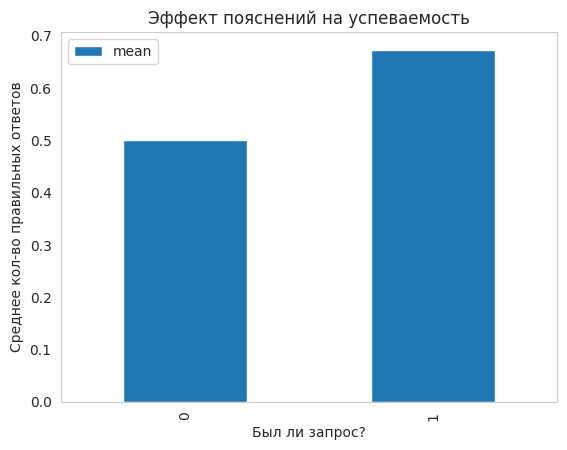

In [18]:
# Группировка данных по наличию объяснений
explanation_exists = (
    train_df[train_df["prior_question_had_explanation"] != -1]
    .groupby("prior_question_had_explanation")["answered_correctly"]
    .agg(["mean"]))

# Визуализация
explanation_exists.plot(kind="bar")
plt.title("Эффект пояснений на успеваемость")
plt.xlabel("Был ли запрос?")
plt.ylabel("Среднее кол-во правильных ответов")
plt.grid()
plt.show()

Вывод по группировке данных explanation_exists:
По графику видно, что в случае когда студент запрашивает пояснение, вероятность ответить на вопрос правильно выше.